In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("ev_charging_patterns.csv")
data.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [5]:
data.shape

(1320, 20)

In [6]:
data.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [8]:
data.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [9]:
data.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

### **Feature Engineering**
**Extract useful information from charging_start and charging_end to analyze time patterns.**

In [10]:
# Convert timestamps to datetime format
data['Charging Start Time'] = pd.to_datetime(data['Charging Start Time'])
data['Charging End Time'] = pd.to_datetime(data['Charging End Time'])

# Extract useful time-related features
data['Day of Week'] = data['Charging Start Time'].dt.day_name()
data['Time of Day'] = data['Charging Start Time'].dt.hour
data['Charging Duration (hours) '] = (data['Charging End Time'] - data['Charging Start Time']).dt.total_seconds() / 3600  # in hours

# Check the new features
print(data[['Charging Start Time', 'Day of Week', 'Time of Day', 'Charging Duration (hours) ']].head())

  Charging Start Time Day of Week  Time of Day  Charging Duration (hours) 
0 2024-01-01 00:00:00      Monday            0                    0.650000
1 2024-01-01 01:00:00      Monday            1                    2.016667
2 2024-01-01 02:00:00      Monday            2                    2.800000
3 2024-01-01 03:00:00      Monday            3                    3.700000
4 2024-01-01 04:00:00      Monday            4                    1.766667


### **Exploratory Data Analysis (EDA)**
**Plotting Charging Patterns by Day of the Week and Hour of the Day**

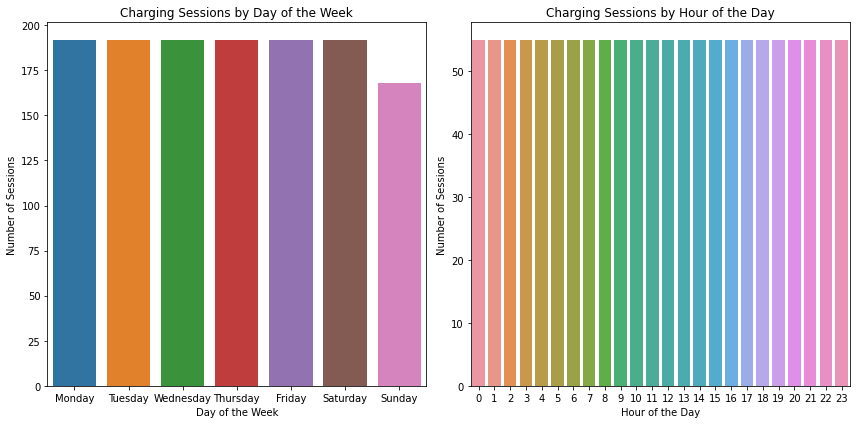

In [11]:
# Set up the plot grid
plt.figure(figsize=(12, 6))

# Plot count of sessions by day of the week
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Day of Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Charging Sessions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Sessions")

# Plot count of sessions by hour of the day
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Time of Day')
plt.title("Charging Sessions by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Sessions")

plt.tight_layout()
plt.show()

### This visualization helps identify peak charging days and hours, which could be insightful for station operators.

### **Advanced Analysis: Average Charging Duration by Day of the Week**
**This can reveal if certain days are associated with longer or shorter charging sessions.**

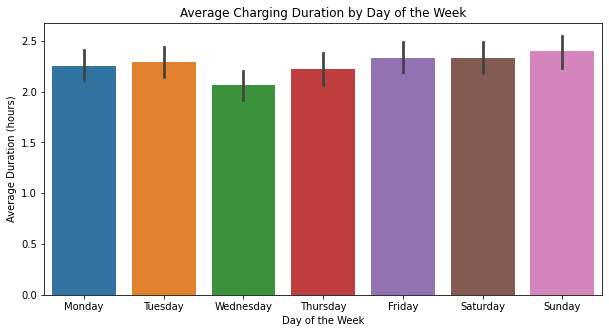

In [12]:
# Plot average session duration by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='Day of Week', y='Charging Duration (hours)', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Average Charging Duration by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Duration (hours)")
plt.show()

### **Feature Engineering for Clustering**

In [13]:
# Calculate average charging session duration per user
user_stats = data.groupby('User ID').agg({
    'Charging Duration (hours)': 'mean',
    'Charging Start Time': lambda x: x.dt.weekday.value_counts().mean(), # average weekly frequency
    'Time of Day': 'mean'  # preferred charging time
}).rename(columns={'Charging Duration (hours)': 'avg_session_duration', 'Charging Start Time': 'avg_weekly_frequency', 'Time of Day': 'avg_start_hour'})

# Display the engineered features
print(user_stats.head())

           avg_session_duration  avg_weekly_frequency  avg_start_hour
User ID                                                              
User_1                 0.591363                   1.0             0.0
User_10                2.026875                   1.0             9.0
User_100               3.621317                   1.0             3.0
User_1000              0.927152                   1.0            15.0
User_1001              1.925078                   1.0            16.0


### **Data Scaling**
**Standardize the data for clustering to ensure all features contribute equally.**

In [14]:
# Standardize features before clustering
scaler = StandardScaler()
user_stats_scaled = scaler.fit_transform(user_stats)

# Convert back to a DataFrame
user_stats_scaled = pd.DataFrame(user_stats_scaled, columns=user_stats.columns, index=user_stats.index)

### **Applying KMeans Clustering**
**Choose an optimal number of clusters using the elbow method, then apply KMeans.**

In [15]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

In [16]:
# Use the elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_stats_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE to find the elbow point
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

#### **Based on the elbow point, let’s assume k=3 clusters.**

In [ ]:
# Apply KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
user_stats['cluster'] = kmeans.fit_predict(user_stats_scaled)

# Check the resulting clusters
print(user_stats.groupby('cluster').mean())

NameError: name 'KMeans' is not defined

### **Visualize the Clusters**
**We’ll visualize clusters in terms of average charging duration and frequency to understand user behavior patterns.**

In [ ]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_stats, x='avg_weekly_frequency', y='avg_session_duration', hue='cluster', palette='viridis')
plt.title('User Segmentation Based on Charging Patterns')
plt.xlabel('Average Weekly Frequency')
plt.ylabel('Average Session Duration (hours)')
plt.legend(title='Cluster')
plt.show()

ValueError: Could not interpret value `cluster` for parameter `hue`

<Figure size 720x432 with 0 Axes>

### **1. Advanced Visualization**
**a) Pair Plot for Cluster Feature Relationships**

**This helps visualize how clusters differ across multiple features like average session duration, frequency, and start hour.**

KeyError: 'cluster'

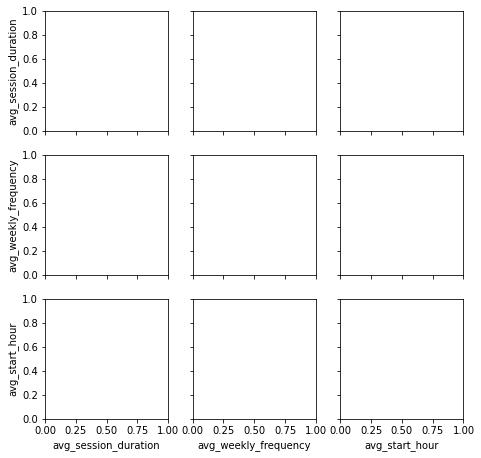

In [17]:
# Pair plot with cluster hue
sns.pairplot(user_stats, vars=['avg_session_duration', 'avg_weekly_frequency', 'avg_start_hour'], hue='cluster', palette='viridis')
plt.suptitle("Pair Plot of Charging Patterns by Cluster", y=1.02)
plt.show()

**This plot will help you see if clusters are well-separated in multiple dimensions or if additional features might be necessary.**

**b) Heatmap of Cluster-Centric Averages**

**A heatmap can display average values across clusters for each feature, providing a concise overview.**

In [18]:
# Calculate cluster-centric averages for heatmap
cluster_means = user_stats.groupby('cluster').mean()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Cluster-Centric Averages for Charging Behavior")
plt.show()

KeyError: 'cluster'

### This heatmap quickly highlights which features are most distinctive across clusters, giving insight into key behavior differences.

### **2. Classification Model to Predict Cluster Membership**

**Here we’ll use a decision tree classifier to predict a user’s cluster based on their average session duration, charging frequency, and preferred start time.**

**a) Split the Data into Train and Test Sets**

In [19]:
from sklearn.model_selection import train_test_split

# Select features and target
X = user_stats[['avg_session_duration', 'avg_weekly_frequency', 'avg_start_hour']]
y = user_stats['cluster']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KeyError: 'cluster'

### **b) Train a Decision Tree Classifier**

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

NameError: name 'X_train' is not defined

**c) Feature Importance Analysis**

**Understanding which features the model prioritizes can reveal key behavioral drivers.**

In [21]:
# Plot feature importance
importances = dt_classifier.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Predicting User Cluster")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### **1. K-Nearest Neighbors (KNN) Classifier**
**KNN is straightforward for classifying users by “neighboring” behaviors in feature space. Let’s apply it here.**

**a) Train and Test Split**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set up feature and target variables
X = user_stats[['avg_session_duration', 'avg_weekly_frequency', 'avg_start_hour']]
y = user_stats['cluster']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KeyError: 'cluster'

**b) Train and Evaluate KNN Classifier**

In [23]:
# Initialize KNN classifier with optimal K (we can use a range from 3 to 7 here)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Model evaluation
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

NameError: name 'X_train' is not defined

#### This model provides insight by categorizing users based on similar charging behavior, which is helpful for identifying distinct behavior “neighborhoods.”

### **2. Random Forest Classifier**

**Random forests are ensemble models that combine multiple decision trees, making them effective for capturing complex feature interactions.**


**a) Train Random Forest Classifier**

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_classifier.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

NameError: name 'X_train' is not defined

**b) Feature Importance Plot**

**Random forests provide feature importance scores, helping us understand which factors drive clustering behavior.**

In [25]:
# Plot feature importance
importances = rf_classifier.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Predicting User Cluster (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### This visualization can help prioritize factors when making service decisions, e.g., if frequency is high on the list, incentivizing or providing discounts for specific user segments could be explored.



### 3. **Gradient Boosting with XGBoost**

#### XGBoost is effective at capturing non-linear relationships and is widely used for high-performance classification.

**a) Train XGBoost Classifier**

In [26]:
from xgboost import XGBClassifier

# Initialize and train XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_classifier.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

NameError: name 'X_train' is not defined

**b) Feature Importance with XGBoost**

#### XGBoost’s feature importance plot can reveal subtle patterns and relationships within the data.

In [27]:
# Plot feature importance
xgb_importances = xgb_classifier.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=xgb_importances, y=features)
plt.title("Feature Importance in Predicting User Cluster (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

AttributeError: Feature importance is not defined for Booster type None